## 📦 Step 0: Install RDKit


In [2]:
%pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 49.6 MB/s eta 0:00:00


## 🧮 Step 1: Import Required Libraries


In [3]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
import matplotlib.pyplot as plt

## 🌿 Step 2: Define Natural Compounds, SMILES & Traditional Uses


In [4]:
natural_compounds = {
    "Quinine": "COC1=CC2=C(C=CN=C2C=C1)[C@H]([C@@H]3C[C@@H]4CCN3C[C@@H]4C=C)O",
    "Artemisinin": "C[C@@H]1CC[C@H]2[C@H](C(=O)O[C@H]3[C@@]24[C@H]1CC[C@](O3)(OO4)C)C",
    "Morphine": "CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@H]3[C@H](C=C4)O",
    "Paclitaxel (Taxol)": "CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@H]3[C@@H]([C@@](C2(C)C)(C[C@@H]1OC(=O)[C@@H]([C@H](C5=CC=CC=C5)NC(=O)C6=CC=CC=C6)O)O)OC(=O)C7=CC=CC=C7)(CO4)OC(=O)C)O)C)OC(=O)C",
    "Camptothecin": "CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3=C2)O",
    "Resveratrol": "C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)O)O)O",
    "Ephedrine": "C[C@@H]([C@@H](C1=CC=CC=C1)O)NC",
    "Curcumin": "COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(C=C2)O)OC)O",
    "Berberine": "COC1=C(C2=C[N+]3=C(C=C2C=C1)C4=CC5=C(C=C4CC3)OCO5)OC",
    "Galanthamine": "CN1CC[C@@]23C=C[C@@H](C[C@@H]2OC4=C(C=CC(=C34)C1)OC)O",
}

traditional_uses = {
    "Quinine": "Used to treat malaria",
    "Artemisinin": "Malaria treatment from Artemisia plant",
    "Morphine": "Painkiller from opium poppy",
    "Paclitaxel (Taxol)": "Anticancer agent from Pacific yew",
    "Camptothecin": "Topoisomerase inhibitor (anticancer)",
    "Resveratrol": "Antioxidant found in grapes",
    "Ephedrine": "Stimulant and bronchodilator from Ephedra",
    "Curcumin": "Anti-inflammatory compound from turmeric",
    "Berberine": "Antimicrobial compound from Berberis",
    "Galanthamine": "Alzheimer’s treatment from snowdrop"
}


## 🧬 Step 3: Create DataFrame and Molecules


In [5]:
compound_df = pd.DataFrame([
    {"Name": name, "SMILES": smi, "Traditional_Use": traditional_uses[name]}
    for name, smi in natural_compounds.items()
])
compound_df["Molecule"] = compound_df["SMILES"].apply(Chem.MolFromSmiles)


## 📊 Step 4: Calculate Molecular Descriptors


In [6]:
descriptor_names = ["MolWt", "MolLogP", "NumHDonors", "NumHAcceptors", "TPSA"]

for desc in descriptor_names:
    func = getattr(Descriptors, desc)
    compound_df[desc] = compound_df["Molecule"].apply(func)



In [7]:
compound_df

,Name,SMILES,Traditional_Use,Molecule,MolWt,MolLogP,NumHDonors,NumHAcceptors,TPSA
0,Quinine,COC1=CC2=C(C=CN=C2C=C1)[C@H]([C@@H]3C[C@@H]4CC...,Used to treat malaria,<rdkit.Chem.rdchem.Mol object at 0x7d942d0836f0>,324.424,3.1732,1,4,45.59
1,Artemisinin,C[C@@H]1CC[C@H]2[C@H](C(=O)O[C@H]3[C@@]24[C@H]...,Malaria treatment from Artemisia plant,<rdkit.Chem.rdchem.Mol object at 0x7d942d083140>,282.336,2.3949,0,5,53.99
2,Morphine,CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...,Painkiller from opium poppy,<rdkit.Chem.rdchem.Mol object at 0x7d942d083bc0>,285.343,1.1981,2,4,52.93
3,Paclitaxel (Taxol),CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...,Anticancer agent from Pacific yew,<rdkit.Chem.rdchem.Mol object at 0x7d942d083c30>,853.918,3.7357,4,14,221.29
4,Camptothecin,CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=...,Topoisomerase inhibitor (anticancer),<rdkit.Chem.rdchem.Mol object at 0x7d942d083ca0>,348.358,2.0796,1,6,81.42
5,Resveratrol,C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)O)O)O,Antioxidant found in grapes,<rdkit.Chem.rdchem.Mol object at 0x7d942d083d10>,228.247,2.9738,3,3,60.69
6,Ephedrine,C[C@@H]([C@@H](C1=CC=CC=C1)O)NC,Stimulant and bronchodilator from Ephedra,<rdkit.Chem.rdchem.Mol object at 0x7d942d083d80>,165.236,1.3279,2,2,32.26
7,Curcumin,COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(...,Anti-inflammatory compound from turmeric,<rdkit.Chem.rdchem.Mol object at 0x7d942d083df0>,368.385,3.3699,2,6,93.06
8,Berberine,COC1=C(C2=C[N+]3=C(C=C2C=C1)C4=CC5=C(C=C4CC3)O...,Antimicrobial compound from Berberis,<rdkit.Chem.rdchem.Mol object at 0x7d942d083e60>,336.367,3.0963,0,4,40.80
9,Galanthamine,CN1CC[C@@]23C=C[C@@H](C[C@@H]2OC4=C(C=CC(=C34)...,Alzheimer’s treatment from snowdrop,<rdkit.Chem.rdchem.Mol object at 0x7d942d083ed0>,287.359,1.8503,1,4,41.93


## 🧪 Step 5: Apply Lipinski's Rule of Five


In [8]:
def lipinski_pass(row):
    return (
        row["MolWt"] <= 500 and
        row["MolLogP"] <= 5 and
        row["NumHDonors"] <= 5 and
        row["NumHAcceptors"] <= 10
    )

compound_df["Lipinski_Pass"] = compound_df.apply(lipinski_pass, axis=1)



In [9]:
compound_df

,Name,SMILES,Traditional_Use,Molecule,MolWt,MolLogP,NumHDonors,NumHAcceptors,TPSA,Lipinski_Pass
0,Quinine,COC1=CC2=C(C=CN=C2C=C1)[C@H]([C@@H]3C[C@@H]4CC...,Used to treat malaria,<rdkit.Chem.rdchem.Mol object at 0x7d942d0836f0>,324.424,3.1732,1,4,45.59,True
1,Artemisinin,C[C@@H]1CC[C@H]2[C@H](C(=O)O[C@H]3[C@@]24[C@H]...,Malaria treatment from Artemisia plant,<rdkit.Chem.rdchem.Mol object at 0x7d942d083140>,282.336,2.3949,0,5,53.99,True
2,Morphine,CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...,Painkiller from opium poppy,<rdkit.Chem.rdchem.Mol object at 0x7d942d083bc0>,285.343,1.1981,2,4,52.93,True
3,Paclitaxel (Taxol),CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...,Anticancer agent from Pacific yew,<rdkit.Chem.rdchem.Mol object at 0x7d942d083c30>,853.918,3.7357,4,14,221.29,False
4,Camptothecin,CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=...,Topoisomerase inhibitor (anticancer),<rdkit.Chem.rdchem.Mol object at 0x7d942d083ca0>,348.358,2.0796,1,6,81.42,True
5,Resveratrol,C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)O)O)O,Antioxidant found in grapes,<rdkit.Chem.rdchem.Mol object at 0x7d942d083d10>,228.247,2.9738,3,3,60.69,True
6,Ephedrine,C[C@@H]([C@@H](C1=CC=CC=C1)O)NC,Stimulant and bronchodilator from Ephedra,<rdkit.Chem.rdchem.Mol object at 0x7d942d083d80>,165.236,1.3279,2,2,32.26,True
7,Curcumin,COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(...,Anti-inflammatory compound from turmeric,<rdkit.Chem.rdchem.Mol object at 0x7d942d083df0>,368.385,3.3699,2,6,93.06,True
8,Berberine,COC1=C(C2=C[N+]3=C(C=C2C=C1)C4=CC5=C(C=C4CC3)O...,Antimicrobial compound from Berberis,<rdkit.Chem.rdchem.Mol object at 0x7d942d083e60>,336.367,3.0963,0,4,40.80,True
9,Galanthamine,CN1CC[C@@]23C=C[C@@H](C[C@@H]2OC4=C(C=CC(=C34)...,Alzheimer’s treatment from snowdrop,<rdkit.Chem.rdchem.Mol object at 0x7d942d083ed0>,287.359,1.8503,1,4,41.93,True


## 📋 Step 6: Final Table View


In [10]:
final_columns = [
    "Name", "Traditional_Use", "MolWt", "MolLogP",
    "NumHDonors", "NumHAcceptors", "TPSA", "Lipinski_Pass"
]
compound_df[final_columns]


,Name,Traditional_Use,MolWt,MolLogP,NumHDonors,NumHAcceptors,TPSA,Lipinski_Pass
0,Quinine,Used to treat malaria,324.424,3.1732,1,4,45.59,True
1,Artemisinin,Malaria treatment from Artemisia plant,282.336,2.3949,0,5,53.99,True
2,Morphine,Painkiller from opium poppy,285.343,1.1981,2,4,52.93,True
3,Paclitaxel (Taxol),Anticancer agent from Pacific yew,853.918,3.7357,4,14,221.29,False
4,Camptothecin,Topoisomerase inhibitor (anticancer),348.358,2.0796,1,6,81.42,True
5,Resveratrol,Antioxidant found in grapes,228.247,2.9738,3,3,60.69,True
6,Ephedrine,Stimulant and bronchodilator from Ephedra,165.236,1.3279,2,2,32.26,True
7,Curcumin,Anti-inflammatory compound from turmeric,368.385,3.3699,2,6,93.06,True
8,Berberine,Antimicrobial compound from Berberis,336.367,3.0963,0,4,40.80,True
9,Galanthamine,Alzheimer’s treatment from snowdrop,287.359,1.8503,1,4,41.93,True


## 📈 Step 7: TPSA vs LogP Visualization


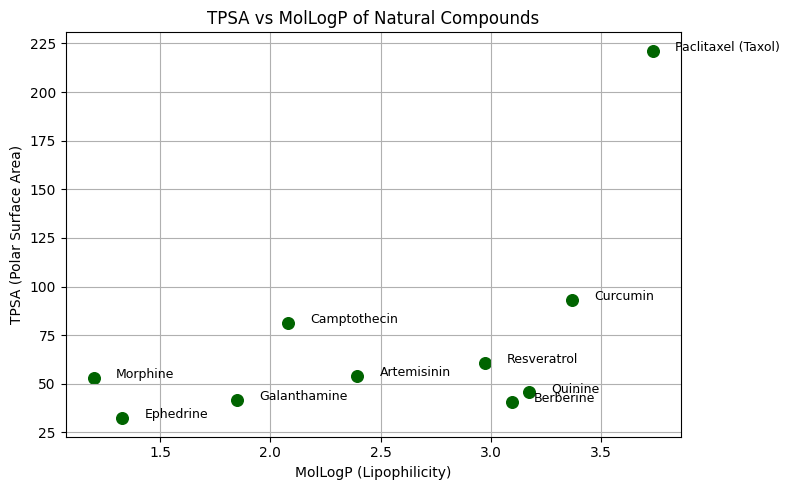

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(compound_df["MolLogP"], compound_df["TPSA"], color='darkgreen', s=70)

for i in range(len(compound_df)):
    plt.text(compound_df["MolLogP"][i]+0.1, compound_df["TPSA"][i], compound_df["Name"][i], fontsize=9)

plt.xlabel("MolLogP (Lipophilicity)")
plt.ylabel("TPSA (Polar Surface Area)")
plt.title("TPSA vs MolLogP of Natural Compounds")
plt.grid(True)
plt.tight_layout()
plt.savefig("tpsa_vs_logp.png", dpi=300)
plt.show()



## 💾 Optional: Save to CSV


In [13]:
compound_df.to_csv("natural_compound_descriptors.csv", index=False)
